<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW6/HW6_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Sachin Gupta (sg758253@sju.edu)
* Date: 04/18/22
* Assignment: 6
* Reference: http://mercury.webster.edu/aleshunas/R_learning_infrastructure/Classification%20of%20data%20using%20decision%20tree%20and%20regression%20tree%20methods.html

https://rpubs.com/minma/cart_with_rpart

https://rstudio-pubs-static.s3.amazonaws.com/248300_37e2d6aefc9141e2baff655f9c9eb1cd.html

In [ ]:
# instaling required lib
install.packages("caret")
install.packages('party')
install.packages("C50")
install.packages("rpart.plot")  


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# importing lib
library(caret)
library(ggplot2)
library(repr)
library(rpart)
library(rpart.plot)
library(C50)
library(party)


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [ ]:
# import dataset
trainingDF <- read.csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW6/Loans_Training.csv")
testDF <- read.csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW6/Loans_Test.csv")

In [ ]:
# display rows
head(trainingDF)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,397,1000,450
2,FALSE,0,403,500,225
3,FALSE,0,408,1000,450
4,FALSE,0,408,2000,900
5,FALSE,0,411,5000,2250
6,FALSE,0,413,5000,2250


In [ ]:
# summary of dataset
summary(trainingDF)

  Approval       Debt.to.Income.Ratio   FICO.Score  Request.Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

In [ ]:
# check null values in trainingDF
sum(is.na(trainingDF))

[1] 0

In [ ]:
# check null values in testDF
sum(is.na(testDF))

[1] 0

No null value is present, so no need for encoding

In [ ]:
# shape of the data frame

dim(trainingDF)

[1] 150302      5

In [ ]:
# Column names
colnames(trainingDF)

[1] "Approval"             "Debt.to.Income.Ratio" "FICO.Score"          
[4] "Request.Amount"       "Interest"

In [ ]:
# Describe the structure of the data frame

str(trainingDF)

'data.frame':	150302 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  397 403 408 408 411 413 416 421 422 432 ...
 $ Request.Amount      : int  1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num  450 225 450 900 2250 2250 2700 900 5400 4500 ...


In [ ]:
str(testDF)

'data.frame':	49698 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  413 449 454 456 457 457 459 461 461 462 ...
 $ Request.Amount      : int  2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest            : num  900 450 2700 450 450 3600 3600 225 2700 8550 ...


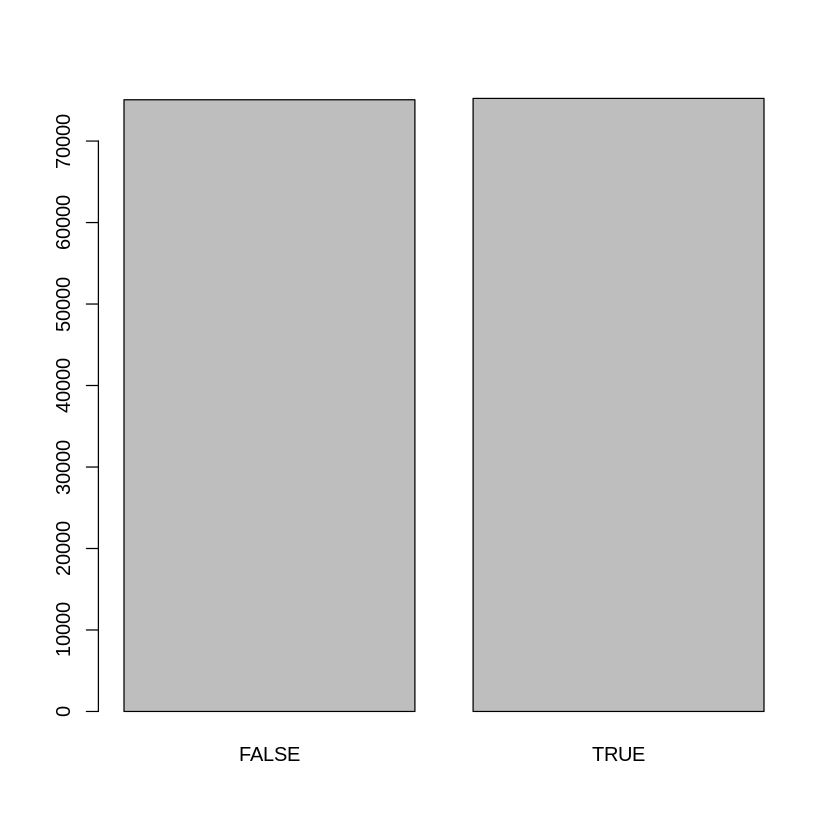

In [ ]:
# Simple Bar Plot to see count of TRUE and False value of Approval class
counts <- table(trainingDF$Approval)
barplot(counts)

# **Creating cart model**

In [ ]:
cart_train1 <- rpart(Approval~., data = trainingDF, cp=.01)

In [ ]:
summary(cart_train1)

Call:
rpart(formula = Approval ~ ., data = trainingDF, cp = 0.01)
  n= 150302 

          CP nsplit rel error    xerror         xstd
1 0.37536172      0 1.0000000 1.0000196 7.841206e-06
2 0.12857983      1 0.6246383 0.6250341 2.069850e-03
3 0.01133642      2 0.4960584 0.4971816 2.353755e-03
4 0.01000000      3 0.4847220 0.4855483 2.338628e-03

Variable importance
          FICO.Score Debt.to.Income.Ratio             Interest 
                  71                   24                    3 
      Request.Amount 
                   3 

Node number 1: 150302 observations,    complexity param=0.3753617
  mean=0.5005655, MSE=0.2499997 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=0.37536170, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve=0.11958450, (0 missing)
      Request.Amount       < 25500 to the right, improve=0.01585947, (0 missing)
      Interest             < 11475 to the right, im

# Visualize the decision tree for cart model

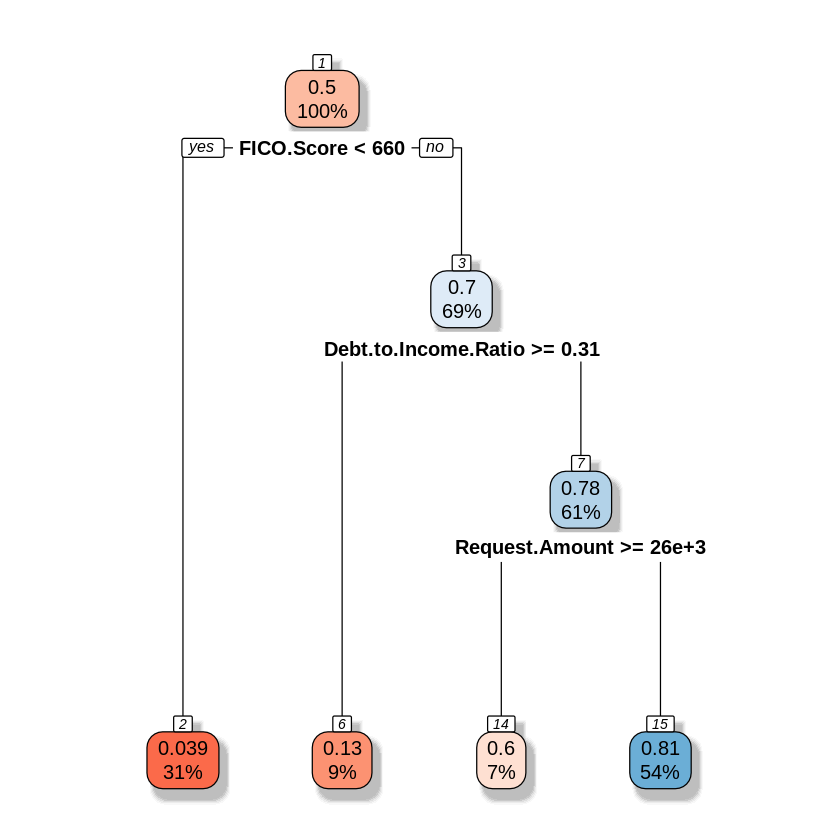

In [ ]:
rpart.plot(cart_train1, box.palette="RdBu", shadow.col="gray", nn=TRUE)

# Confusion matrix for cart model

In [ ]:
your_threshold <- 0.5
cart_model_prediction <- predict(cart_train1, testDF, type = "vector") >= your_threshold
confusionMatrix(table(testDF$Approval, cart_model_prediction))


Confusion Matrix and Statistics

       cart_model_prediction
        FALSE  TRUE
  FALSE 18314  6620
  TRUE   1171 23593
                                        
               Accuracy : 0.8432        
                 95% CI : (0.84, 0.8464)
    No Information Rate : 0.6079        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6867        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9399        
            Specificity : 0.7809        
         Pos Pred Value : 0.7345        
         Neg Pred Value : 0.9527        
             Prevalence : 0.3921        
         Detection Rate : 0.3685        
   Detection Prevalence : 0.5017        
      Balanced Accuracy : 0.8604        
                                        
       'Positive' Class : FALSE         
                                        

# Accuracy for cart model 

In [ ]:
accuracy <- sum( cart_model_prediction == testDF$Approval ) / length( cart_model_prediction )
cart_model_accuracy <- accuracy * 100
cat('Cart model accuracy is : ',cart_model_accuracy)


Cart model accuracy is :  84.32331

We are getting 84.32 percent of accuracy using cart model.

# **Creating C5.0 model**

In [ ]:
c5_model_train1 <- C5.0(x = trainingDF[, -1], y = as.factor(trainingDF$Approval),
             control=C5.0Control(minCases=1000))
summary(c5_model_train1)


Call:
C5.0.default(x = trainingDF[, -1], y = as.factor(trainingDF$Approval),
 control = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 19 23:28:28 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)


Evaluation on training data (150302 cases):

	    Decision Tree   
	  

# Decision Tree for C5.0 model

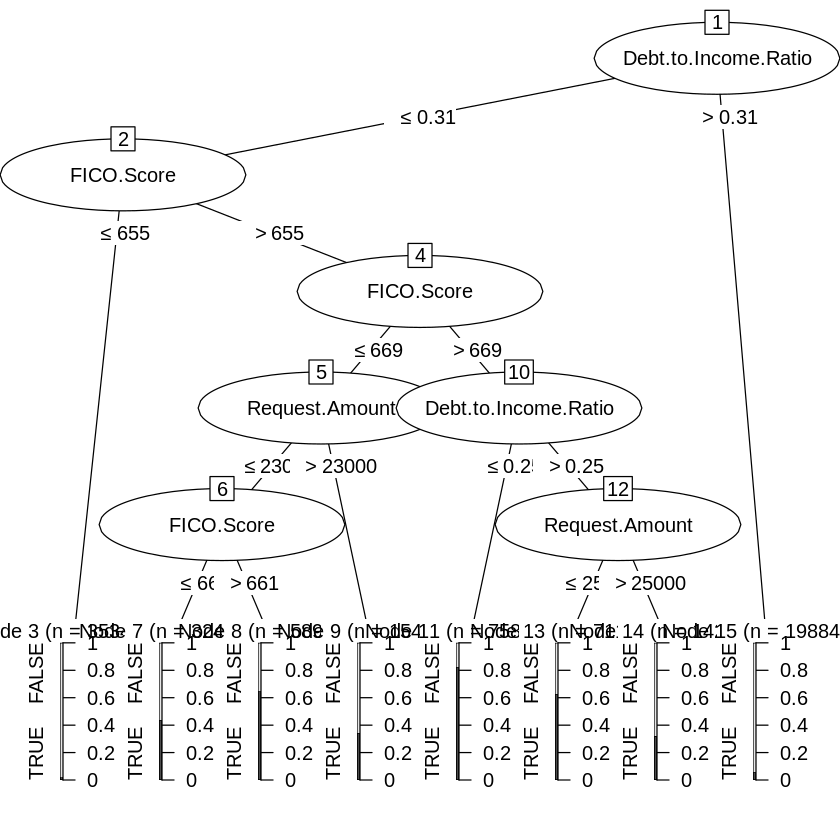

In [ ]:
plot(c5_model_train1)

# Display confusion matrix 

In [ ]:
c5_model_prediction <- predict(c5_model_train1, testDF, type = "class") 
confusionMatrix(table(testDF$Approval, c5_model_prediction))

Confusion Matrix and Statistics

       c5_model_prediction
        FALSE  TRUE
  FALSE 18842  6092
  TRUE   1504 23260
                                         
               Accuracy : 0.8472         
                 95% CI : (0.844, 0.8503)
    No Information Rate : 0.5906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6945         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9261         
            Specificity : 0.7925         
         Pos Pred Value : 0.7557         
         Neg Pred Value : 0.9393         
             Prevalence : 0.4094         
         Detection Rate : 0.3791         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8593         
                                         
       'Positive' Class : FALSE          
                                        

# Accuracy for c5.0 model

In [ ]:
accuracy <- sum( c5_model_prediction == testDF$Approval ) / length( c5_model_prediction )
c5_model_accuracy <- accuracy * 100
cat('C5 model accuracy is : ',c5_model_accuracy)

C5 model accuracy is :  84.71568

We are getting 84.71 percent of accuracy using cart model.

# Compare model



In [24]:
value1 <- paste("CART", format(round(cart_model_accuracy, 2), nsmall = 2), sep="=")
value2 <- paste("C5.0", format(round(c5_model_accuracy, 2), nsmall = 2), sep="=")
labels <- c(value1,value2)
accuracy_model = c(cart_model_accuracy, c5_model_accuracy)

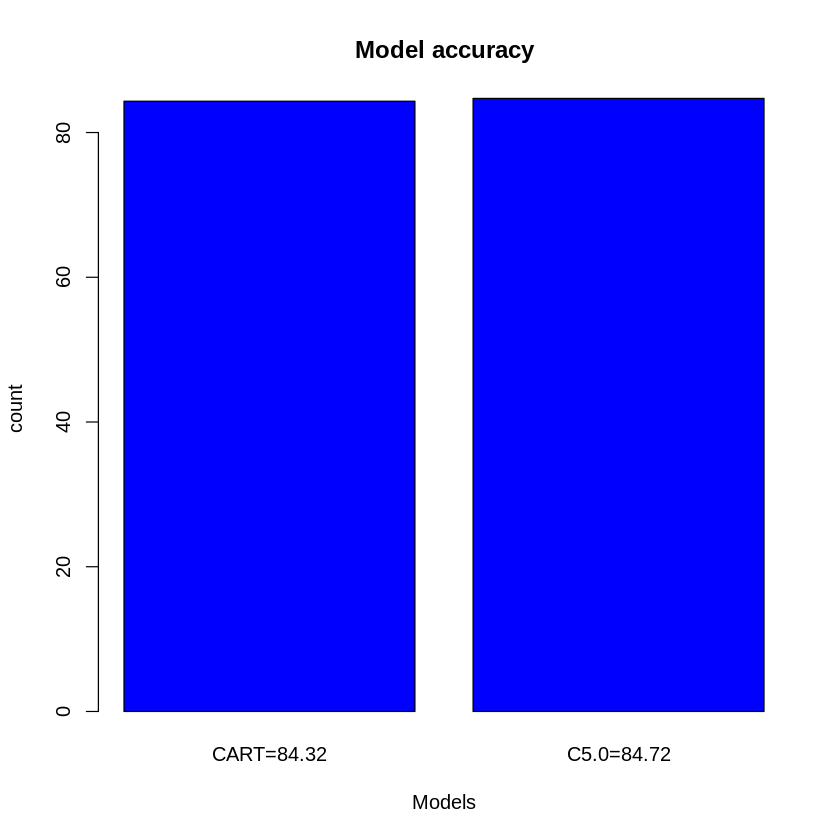

In [25]:
barplot(accuracy_model, main = "Model accuracy",ylab = "count", xlab = 'Models',names.arg = labels,col="blue")